This notebook run highthrouput alphafold sturcutre predictions on sdma clusters

Written by PTI, MGER and JKJV, 08Feb2022

# Load the sequence from file: Sequence_ID and amino acid sequence

In [27]:
#f=open('/z/home/pti/protein_fast_pet.txt','r')
f=open('worklist_export.fastaconvert_1line.fas','r')

seqs={}
for line in f.readlines():
    print(line)
    line= line.strip()
    if len(line) == 0:
        continue
    if line[0] == '>':
        key=line.replace(' ','_')
        key=line.replace(':','_')
        key=key.replace('>','')
        key=key.replace('?','_')
        key=key.replace('|','_')
        key=key.replace(',','_')
        key=key.replace('\\','_')
        key=key.replace(';','_')
        key = 'AF2_' + key
    else:
        line = line.upper()
        seqs[key] = line
seqs

>TREMBL:A0A3N2PMM5

MYKCILALSALAPLAAANCAHGTSLFPRSQALSVDVAVFGFNGLEGPLNWHALHEDNLDCAVGENQSPINIESATIDKACGSSLHFQLDDHPNGAEFFNLGSTVEAEATGTINLRNKTYNLVQFHFHTPSEHRIDSEYYPEEVHFVFQASDGALAVVGVLIEIGTDEEASSLLIDVFENLEDIAIPGDETHTGPLDFGELEAHIQSSEIFQYSGSLTTPPCTQDIAWNVVKNPIYIDVDTFRRSKSVMKFNSRYTQNTPGQINLLSNACNGI

>AHGP:EFP1H60T13

MYKCILALSALAPLAAANCAHGTSLFPRSQALSVDVAVFGFNGLEGPLNWHALHEDNLDCAVGENQSPINIESATIDKACGSSLHFQLDDHPNGAEFFNLGSTVEAEATGTINLRNKTYNLVQFHFHTPSEHRIDSEYYPEEVHFVFQASDGALAVVGVLIEIGTDEEASSLLIDVFENLEDIAIPGDETHTGPLDFGELEAHIQSSEIFQYSGSLTTPPCTQDIAWNVVKNPIYIDVDTFRRSKSVMKFNSRYTQNTPGQINLLSNACNGI

>TREMBL:A0A3B1A821

MKKQLIMAALVLLSNTSFANESSHWGYGNSNGPTHWSEINPDFSLCKNGKNQSPINISGFIKAPHESLKPHYKSKVDEIVNNGHTIQINMHAGSNIKIDNTHFNLNQFHFHSPSENTINGKSFPLEGHFVHTDKNNNLVVLAVMFENGDKNTALETLWKHMPINSGEHKNLTNNITVSNLMPKNMDYYRFNGSLTTPPCSEGVRWYVFKNPIKVSKQQVDQFHETIHHANNRPVQSINARLIIE

>NZGP:EFP2FM1677

MLGSVVALSLLAPLAAANCAYGTRMYARSAAAAAVAEFGFNELEGPLNWHAFADDSELCATGTNQSPINVDSSKISKVAGSTITFEVDDYPNGAEFENLGSTVEAEAEGRLVLGSKQYDLVQFHFHTPSE

{'AF2_TREMBL_A0A3N2PMM5': 'MYKCILALSALAPLAAANCAHGTSLFPRSQALSVDVAVFGFNGLEGPLNWHALHEDNLDCAVGENQSPINIESATIDKACGSSLHFQLDDHPNGAEFFNLGSTVEAEATGTINLRNKTYNLVQFHFHTPSEHRIDSEYYPEEVHFVFQASDGALAVVGVLIEIGTDEEASSLLIDVFENLEDIAIPGDETHTGPLDFGELEAHIQSSEIFQYSGSLTTPPCTQDIAWNVVKNPIYIDVDTFRRSKSVMKFNSRYTQNTPGQINLLSNACNGI',
 'AF2_AHGP_EFP1H60T13': 'MYKCILALSALAPLAAANCAHGTSLFPRSQALSVDVAVFGFNGLEGPLNWHALHEDNLDCAVGENQSPINIESATIDKACGSSLHFQLDDHPNGAEFFNLGSTVEAEATGTINLRNKTYNLVQFHFHTPSEHRIDSEYYPEEVHFVFQASDGALAVVGVLIEIGTDEEASSLLIDVFENLEDIAIPGDETHTGPLDFGELEAHIQSSEIFQYSGSLTTPPCTQDIAWNVVKNPIYIDVDTFRRSKSVMKFNSRYTQNTPGQINLLSNACNGI',
 'AF2_TREMBL_A0A3B1A821': 'MKKQLIMAALVLLSNTSFANESSHWGYGNSNGPTHWSEINPDFSLCKNGKNQSPINISGFIKAPHESLKPHYKSKVDEIVNNGHTIQINMHAGSNIKIDNTHFNLNQFHFHSPSENTINGKSFPLEGHFVHTDKNNNLVVLAVMFENGDKNTALETLWKHMPINSGEHKNLTNNITVSNLMPKNMDYYRFNGSLTTPPCSEGVRWYVFKNPIKVSKQQVDQFHETIHHANNRPVQSINARLIIE',
 'AF2_NZGP_EFP2FM1677': 'MLGSVVALSLLAPLAAANCAYGTRMYARSAAAAAVAEFGFNELEGPLNWHAFADDSELCATGTNQSPINVDSSKISKVAGSTITFEVDDYPNGAEFENL

# Create output directory

In [28]:
from datetime import datetime

now = datetime.now() # current date and time
date_time = now.strftime("%Y_%m_%d_%H_%M_%S")

work_dir = !pwd
output_dir = work_dir[0] + '/alphafold_output_date_' + date_time +'/'
work_dir = work_dir[0] + '/alphafold_job_submit_script_date_' + date_time +'/'
print(work_dir)
print(output_dir)

/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/
/z/home/pti/alphafold_output_date_2022_07_13_17_53_02/


In [29]:
server_list_f = open("/z/home/pti/projects/machine_learning/alphafold/alphafold_batch/zebra_sdma_list.txt",'r')
server_list = ','.join([line.strip() for line in server_list_f.readlines()] )
#server_list

# Generate script for job submission, one job per protein/sequence

In [30]:
import os
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)
if not os.path.isdir(output_dir):
    os.makedirs(output_dir)
        
for val in seqs.keys():  
    outfile_name=work_dir + val+'.qs'
    outfile=open(outfile_name,'w')
    outfile.write('\
\n#!/bin/bash -i\
\n#$ -N '+ val +'\
\n#$ -o '+work_dir+'\
\n#$ -e '+work_dir+'\
\ncd '+output_dir+'\
\nQUEUE=\''+server_list+'\'\
\nexport PATH=\"/z/home/pti/miniconda3/bin:$PATH\" \
\nsource activate myenv\
\nexport PYTHONUSERBASE=intentionally-disabled\
\npython3 /z/home/pti/projects/machine_learning/alphafold/alphafold_batch/Protein_structure_prediction_with_AlphaFold2.py ' +seqs[val] + ' ' + val + '\
\n\n')
    outfile.close()
    print(outfile_name)
#--

/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_TREMBL_A0A3N2PMM5.qs
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_AHGP_EFP1H60T13.qs
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_TREMBL_A0A3B1A821.qs
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_NZGP_EFP2FM1677.qs
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_NZGP_EFP1NPP6HP.qs
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_NZGP_EFP1CP7N9L.qs
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_NZGP_EFP15H0WL.qs
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_NZGP_EFP2FLT59X.qs
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_TREMBL_A0A1W1BHC1.qs
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_TREMBL_A0A804HY02.qs
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_TREMBL_A0A3B0YAE2.qs
/z/home/pti/alphafold_j

# Submit jobs on SDMA cluster, as many as 400 jobs can run at the same time, the others will be in the queue

* Output structure will be saved in the folder 'alphafold_output'
* 3 model structures are generated for each protein
* "unrelaxed" and "relaxed" pdbs are structures before and after molecular simulations relaxation respectively
* .."with great power comes great responsibility"

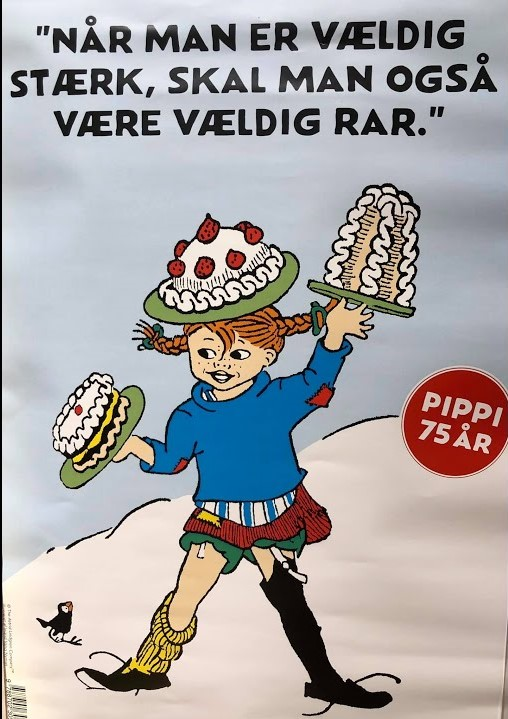

In [31]:
from IPython.display import Image
Image("/z/home/pti/projects/machine_learning/alphafold/alphafold_batch/pippi.png",width = 300, height = 150)

In [32]:
import glob
for val in glob.glob('{}/*.qs'.format(work_dir)):
    print(val)
    !qsub -pe shm 2 -l mem_consumable=8 -cwd $val 

/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_TREMBL_A0A3N2PMM5.qs
Your job 144139 ("AF2_TREMBL_A0A3N2PMM5") has been submitted
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_AHGP_EFP1H60T13.qs
Your job 144140 ("AF2_AHGP_EFP1H60T13") has been submitted
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_TREMBL_A0A3B1A821.qs
Your job 144141 ("AF2_TREMBL_A0A3B1A821") has been submitted
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_NZGP_EFP2FM1677.qs
Your job 144142 ("AF2_NZGP_EFP2FM1677") has been submitted
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_NZGP_EFP1NPP6HP.qs
Your job 144143 ("AF2_NZGP_EFP1NPP6HP") has been submitted
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_NZGP_EFP1CP7N9L.qs
Your job 144144 ("AF2_NZGP_EFP1CP7N9L") has been submitted
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_NZGP_EFP15H0WL.qs
Your job 144145 ("AF2_N

/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_TREMBL_A0A6P5LX15.qs
Your job 144194 ("AF2_TREMBL_A0A6P5LX15") has been submitted
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_TREMBL_A0A8D2JBV2.qs
Your job 144195 ("AF2_TREMBL_A0A8D2JBV2") has been submitted
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_TREMBL_A0A3B0RG14.qs
Your job 144196 ("AF2_TREMBL_A0A3B0RG14") has been submitted
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_TREMBL_A0A3B0V742.qs
Your job 144197 ("AF2_TREMBL_A0A3B0V742") has been submitted
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_TREMBL_A0A3B0XTB7.qs
Your job 144198 ("AF2_TREMBL_A0A3B0XTB7") has been submitted
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_TREMBL_A0A1I8B4G4.qs
Your job 144199 ("AF2_TREMBL_A0A1I8B4G4") has been submitted
/z/home/pti/alphafold_job_submit_script_date_2022_07_13_17_53_02/AF2_TREMBL_A0A6G1PQH5.qs
Your

# Check status of the jobs

In [33]:
user_list = !whoami
for user in user_list:
    print(user)
    !qstat -u $user

pti
job-ID  prior   name       user         state submit/start at     queue                          slots ja-task-ID 
-----------------------------------------------------------------------------------------------------------------
 144139 0.62501 AF2_TREMBL pti          r     07/13/2022 17:53:15 all.q@zebra23.nzcorp.net           2        
 144140 0.62501 AF2_AHGP_E pti          r     07/13/2022 17:53:15 all.q@zebra24.nzcorp.net           2        
 144141 0.62501 AF2_TREMBL pti          r     07/13/2022 17:53:15 all.q@zebra23.nzcorp.net           2        
 144142 0.62501 AF2_NZGP_E pti          r     07/13/2022 17:53:15 all.q@zebra24.nzcorp.net           2        
 144143 0.62501 AF2_NZGP_E pti          r     07/13/2022 17:53:15 all.q@zebra23.nzcorp.net           2        
 144144 0.62501 AF2_NZGP_E pti          r     07/13/2022 17:53:15 all.q@zebra24.nzcorp.net           2        
 144145 0.62501 AF2_NZGP_E pti          r     07/13/2022 17:53:15 all.q@zebra23.nzcorp.net           